In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
#load the pickle file
from sklearn.externals import joblib
model=joblib.load('emp_rating_model')
#import sklearn .mtrices for evaluating the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings #Remove warnings
warnings.simplefilter('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# load the Test data 
X_test=pd.read_pickle('x_test')
y_test=pd.read_pickle('y_test')

In [3]:
#Predict the model
y_predict=model.predict(X_test)

## Evaluating the model

In [4]:
print('Accuracy score',accuracy_score(y_test,y_predict))
print('________________________Calssification_report_________________')
print(classification_report(y_test,y_predict))
print('________________________Crosstab_________________')
pd.crosstab(y_test,y_predict)

Accuracy score 0.9537953795379538
________________________Calssification_report_________________
              precision    recall  f1-score   support

           2       0.93      0.95      0.94        44
           3       0.97      0.97      0.97       229
           4       0.86      0.83      0.85        30

    accuracy                           0.95       303
   macro avg       0.92      0.92      0.92       303
weighted avg       0.95      0.95      0.95       303

________________________Crosstab_________________


col_0,2,3,4
PerformanceRating,,,
2,42,2,0
3,3,222,4
4,0,5,25


#Analize predicted value and Actual value

In [5]:
from collections import Counter
print('Predicted------------->',Counter(y_predict))
print('Actual------------>',Counter(y_test))

Predicted-------------> Counter({3: 229, 2: 45, 4: 29})
Actual------------> Counter({3: 229, 2: 44, 4: 30})


Text(33.0, 0.5, 'Actual_Rating')

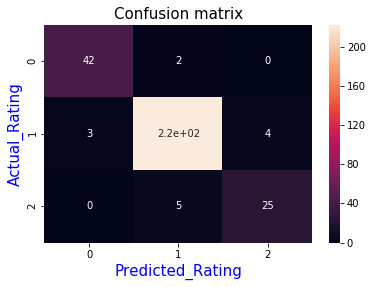

In [6]:
sb.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.title('Confusion matrix',fontsize=15)
plt.xlabel('Predicted_Rating',fontsize=15,color='blue')
plt.ylabel('Actual_Rating',fontsize=15,color='blue')


## Create dataframe of Actual and Predicted  data ,And convert into Csv

In [7]:
df=pd.DataFrame({'ACTUAL':y_test,'PREDICTED':y_predict})
df.to_csv('Submission.csv')

In [8]:
#Wec an load dataset 
df2=pd.read_csv('Submission.csv')
#df2.drop(columns='Unnamed: 0',axis=1)

### Pairplot()
* Apply Dataframe created by  Actual and Predicted data.
* show the Relationship pair wise.


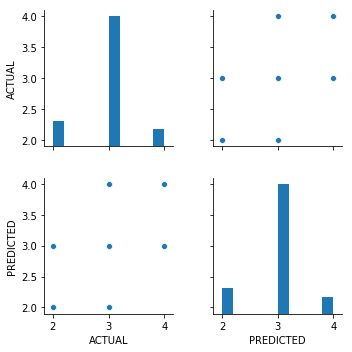

In [9]:
sb.pairplot(df)
plt.tight_layout()